# Importing Libraries

In [25]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [26]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

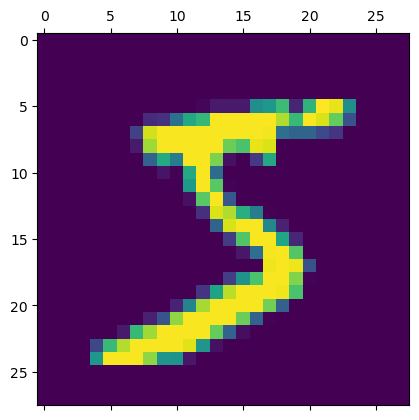

In [29]:
#to see how first image looks
plt.matshow(x_train[0])
plt.show()

In [30]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [33]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [34]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6381 - accuracy: 0.8385 - val_loss: 0.3556 - val_accuracy: 0.9063
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.9053 - val_loss: 0.2937 - val_accuracy: 0.9185
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2897 - accuracy: 0.9189 - val_loss: 0.2611 - val_accuracy: 0.9301
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2596 - accuracy: 0.9270 - val_loss: 0.2386 - val_accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2367 - accuracy: 0.9341 - val_loss: 0.2196 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2180 - accuracy: 0.9383 - val_loss: 0.2041 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2025 - accuracy: 0.9439 - val_loss: 0.1940 - val_accuracy:

# Evaluate the Model

In [35]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9526
Loss = 0.164
Accuracy = 0.953


# Making Prediction on New Data

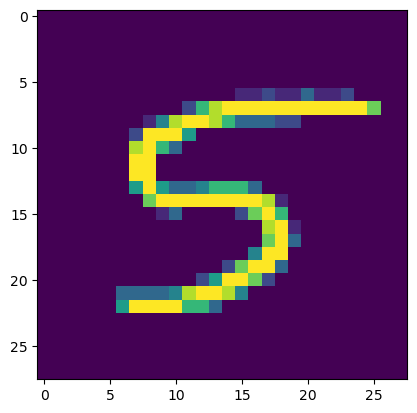

In [38]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [39]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 968    0    1    1    0    4    4    1    1    0]
 [   0 1114    3    2    1    1    4    2    8    0]
 [   7    1  984    7    6    1    6    7   10    3]
 [   1    2   10  964    0    8    1   11   11    2]
 [   1    2    5    2  938    0    8    3    5   18]
 [   9    1    2   20    2  829   11    3   11    4]
 [   9    3    2    0   10    9  920    0    5    0]
 [   2    8   21    4    5    1    0  966    1   20]
 [   6    2    3   16    8    7   10    8  910    4]
 [  10    6    1   10   30    4    1    8    6  933]], shape=(10, 10), dtype=int32)
